<a href="https://colab.research.google.com/github/mahsa1993musavirad/heart_disease_classification/blob/main/NikamoozTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem definition & EDA:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections

In [3]:
df = pd.read_csv('/content/drive/MyDrive/german.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [4]:
df.shape

(1000, 21)

In [5]:
df.describe()

,1,4,7,10,12,15,17,20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1000 non-null   object
 1   1       1000 non-null   int64 
 2   2       1000 non-null   object
 3   3       1000 non-null   object
 4   4       1000 non-null   int64 
 5   5       1000 non-null   object
 6   6       1000 non-null   object
 7   7       1000 non-null   int64 
 8   8       1000 non-null   object
 9   9       1000 non-null   object
 10  10      1000 non-null   int64 
 11  11      1000 non-null   object
 12  12      1000 non-null   int64 
 13  13      1000 non-null   object
 14  14      1000 non-null   object
 15  15      1000 non-null   int64 
 16  16      1000 non-null   object
 17  17      1000 non-null   int64 
 18  18      1000 non-null   object
 19  19      1000 non-null   object
 20  20      1000 non-null   int64 
dtypes: int64(8), object(13)
memory usage: 164.2+ KB


In [7]:
for col in df.columns:
  print('column ', col, df[col].nunique())
  if df[col].nunique() <= 10:
    print(df[col].unique())

column  0 4
['A11' 'A12' 'A14' 'A13']
column  1 33
column  2 5
['A34' 'A32' 'A33' 'A30' 'A31']
column  3 10
['A43' 'A46' 'A42' 'A40' 'A41' 'A49' 'A44' 'A45' 'A410' 'A48']
column  4 921
column  5 5
['A65' 'A61' 'A63' 'A64' 'A62']
column  6 5
['A75' 'A73' 'A74' 'A71' 'A72']
column  7 4
[4 2 3 1]
column  8 4
['A93' 'A92' 'A91' 'A94']
column  9 3
['A101' 'A103' 'A102']
column  10 4
[4 2 3 1]
column  11 4
['A121' 'A122' 'A124' 'A123']
column  12 53
column  13 3
['A143' 'A141' 'A142']
column  14 3
['A152' 'A153' 'A151']
column  15 4
[2 1 3 4]
column  16 4
['A173' 'A172' 'A174' 'A171']
column  17 2
[1 2]
column  18 2
['A192' 'A191']
column  19 2
['A201' 'A202']
column  20 2
[1 2]


In [8]:
target = df.values[:,-1]
counter = collections.Counter(target)
for k,v in counter.items():
  per = v / len(target) * 100
  print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=1, Count=700, Percentage=70.000%
Class=2, Count=300, Percentage=30.000%


This dataset requires use of a cost matrix (see below)
 

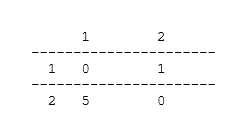
(1 = Good,  2 = Bad)

the rows represent the actual classification and the columns
the predicted classification.

It is worse to class a customer as good when they are bad (5), 
than it is to class a customer as bad when they are good (1).


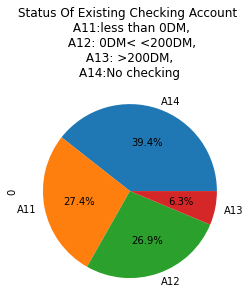

In [9]:
df[0].value_counts().plot.pie(stacked=True, title='Status Of Existing Checking Account \n A11:less than 0DM,\n A12: 0DM< <200DM,\n A13: >200DM, \nA14:No checking', autopct='%.1f%%')
plt.show()

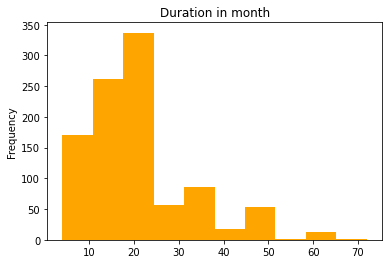

In [10]:
df[1].plot.hist(title='Duration in month', color='orange')

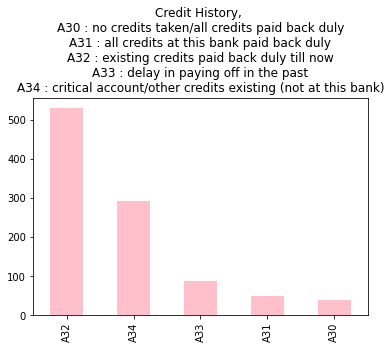

In [11]:
df[2].value_counts().plot.bar( color='pink', title='''Credit History, \nA30 : no credits taken/all credits paid back duly\nA31 : all credits at this bank paid back duly\nA32 : existing credits paid back duly till now\nA33 : delay in paying off in the past\nA34 : critical account/other credits existing (not at this bank)''')
plt.show()

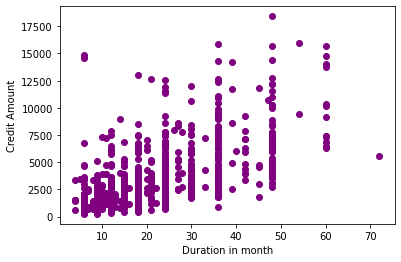

In [12]:
xData = df[1]
yData = df[4]
plt.scatter(xData, yData, color='purple')
plt.xlabel('Duration in month')
plt.ylabel('Credit Amount')
plt.show()

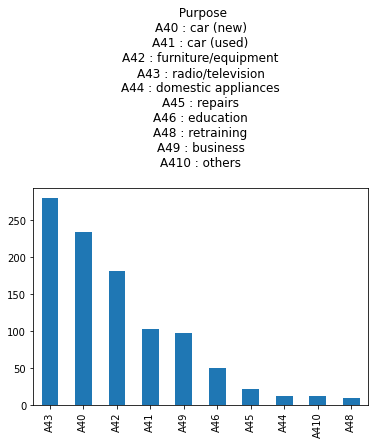

In [13]:
df[3].value_counts().plot.bar(title=''' Purpose\nA40 : car (new)\nA41 : car (used)\nA42 : furniture/equipment\nA43 : radio/television\nA44 : domestic appliances\nA45 : repairs\nA46 : education\nA48 : retraining\nA49 : business\nA410 : others\n''')

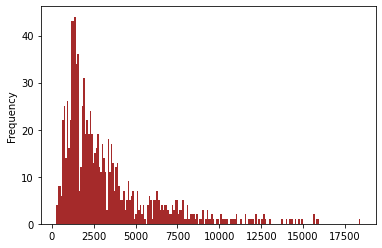

In [14]:
df[4].plot.hist(bins=200, color='brown')
plt.show()

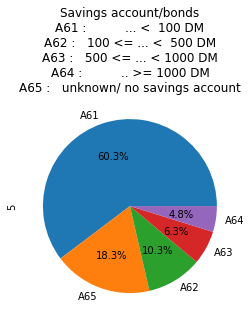

In [15]:
df[5].value_counts().plot.pie(title='''Savings account/bonds\nA61 :          ... <  100 DM\nA62 :   100 <= ... <  500 DM\nA63 :   500 <= ... < 1000 DM\nA64 :          .. >= 1000 DM\nA65 :   unknown/ no savings account''', autopct='%.1f%%')
plt.show()

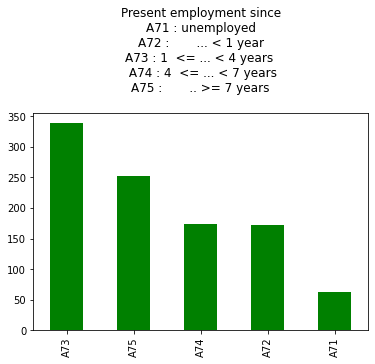

In [16]:
df[6].value_counts().plot.bar(color='green',
                              title='''Present employment since\nA71 : unemployed\nA72 :       ... < 1 year\nA73 : 1  <= ... < 4 years \n A74 : 4  <= ... < 7 years\nA75 :       .. >= 7 years
''')
plt.show()

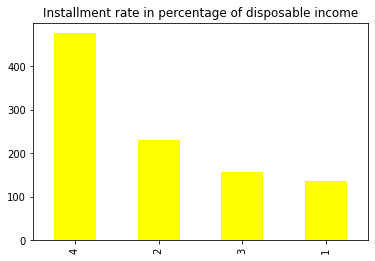

In [17]:
df[7].value_counts().plot.bar(title='Installment rate in percentage of disposable income', color='yellow')
plt.show()

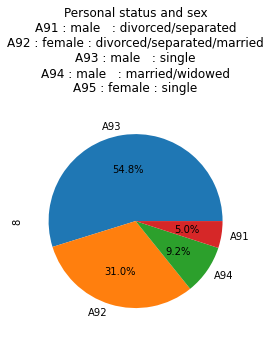

In [18]:
df[8].value_counts().plot.pie(title='''Personal status and sex\nA91 : male   : divorced/separated\nA92 : female : divorced/separated/married\nA93 : male   : single\nA94 : male   : married/widowed\nA95 : female : single\n''',autopct='%.1f%%' )
plt.show()

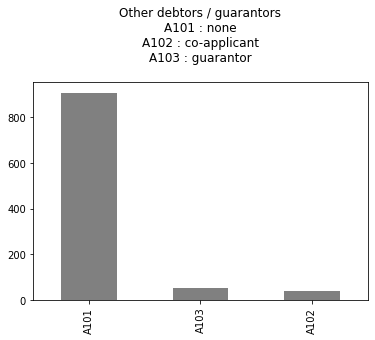

In [19]:
df[9].value_counts().plot.bar(color='grey', title='''Other debtors / guarantors\nA101 : none\nA102 : co-applicant\nA103 : guarantor\n''')
plt.show()

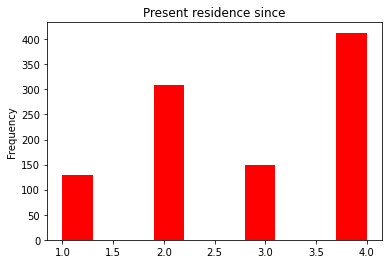

In [20]:
df[10].plot.hist(title='Present residence since', color='red')
plt.show()

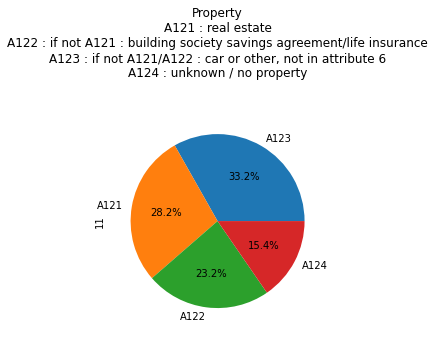

In [21]:
df[11].value_counts().plot.pie(autopct='%.1f%%',
                               title='''Property\nA121 : real estate\nA122 : if not A121 : building society savings agreement/life insurance\nA123 : if not A121/A122 : car or other, not in attribute 6\nA124 : unknown / no property\n
 ''')
plt.show()

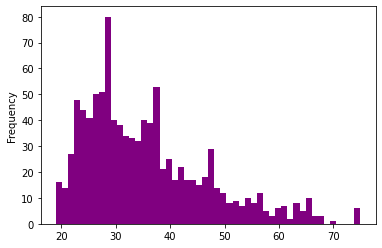

In [22]:
df[12].plot.hist(bins=50, color='purple')
plt.show()

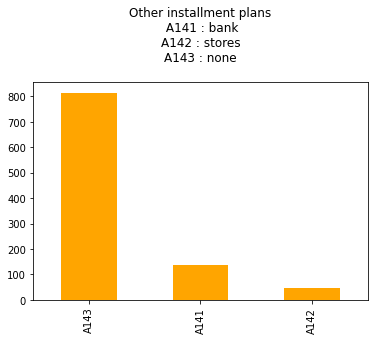

In [23]:
df[13].value_counts().plot.bar(title='Other installment plans\n A141 : bank\nA142 : stores\nA143 : none\n', color='orange')

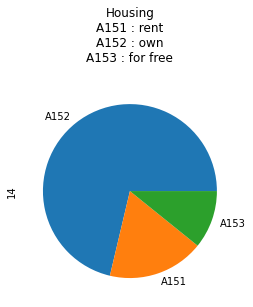

In [24]:
df[14].value_counts().plot.pie(title='''Housing\nA151 : rent\nA152 : own\nA153 : for free\n''')
plt.show()

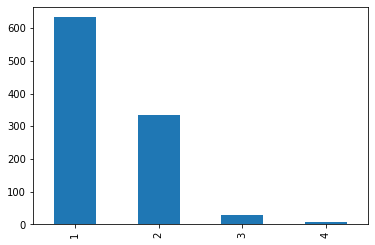

In [25]:
df[15].value_counts().plot.bar()

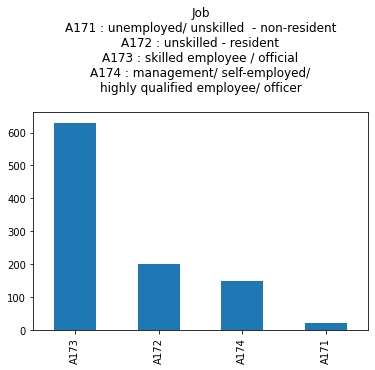

In [26]:
df[16].value_counts().plot.bar(title='''Job\nA171 : unemployed/ unskilled  - non-resident\nA172 : unskilled - resident\nA173 : skilled employee / official\nA174 : management/ self-employed/\nhighly qualified employee/ officer\n''')
plt.show()

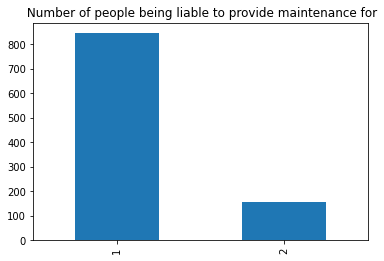

In [27]:
df[17].value_counts().plot.bar(title=''' Number of people being liable to provide maintenance for''')
plt.show()

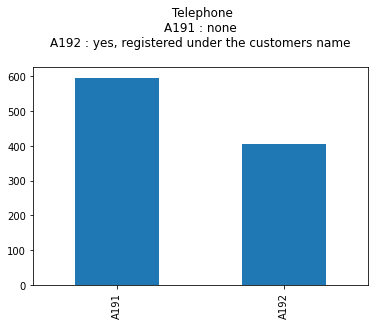

In [28]:
df[18].value_counts().plot.bar(title=''' Telephone\nA191 : none\nA192 : yes, registered under the customers name\n''')
plt.show()

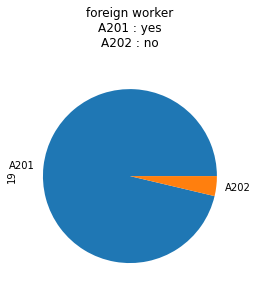

In [29]:
df[19].value_counts().plot.pie(title='''foreign worker\nA201 : yes\nA202 : no\n''' )
plt.show()

##Feature Selection

In [30]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.columns:
  if df[col].dtype == 'object':
    df[col]=le.fit_transform(df[col])

df[20] = le.fit_transform(df[20])
print(df.dtypes)

0     int64
1     int64
2     int64
3     int64
4     int64
5     int64
6     int64
7     int64
8     int64
9     int64
10    int64
11    int64
12    int64
13    int64
14    int64
15    int64
16    int64
17    int64
18    int64
19    int64
20    int64
dtype: object


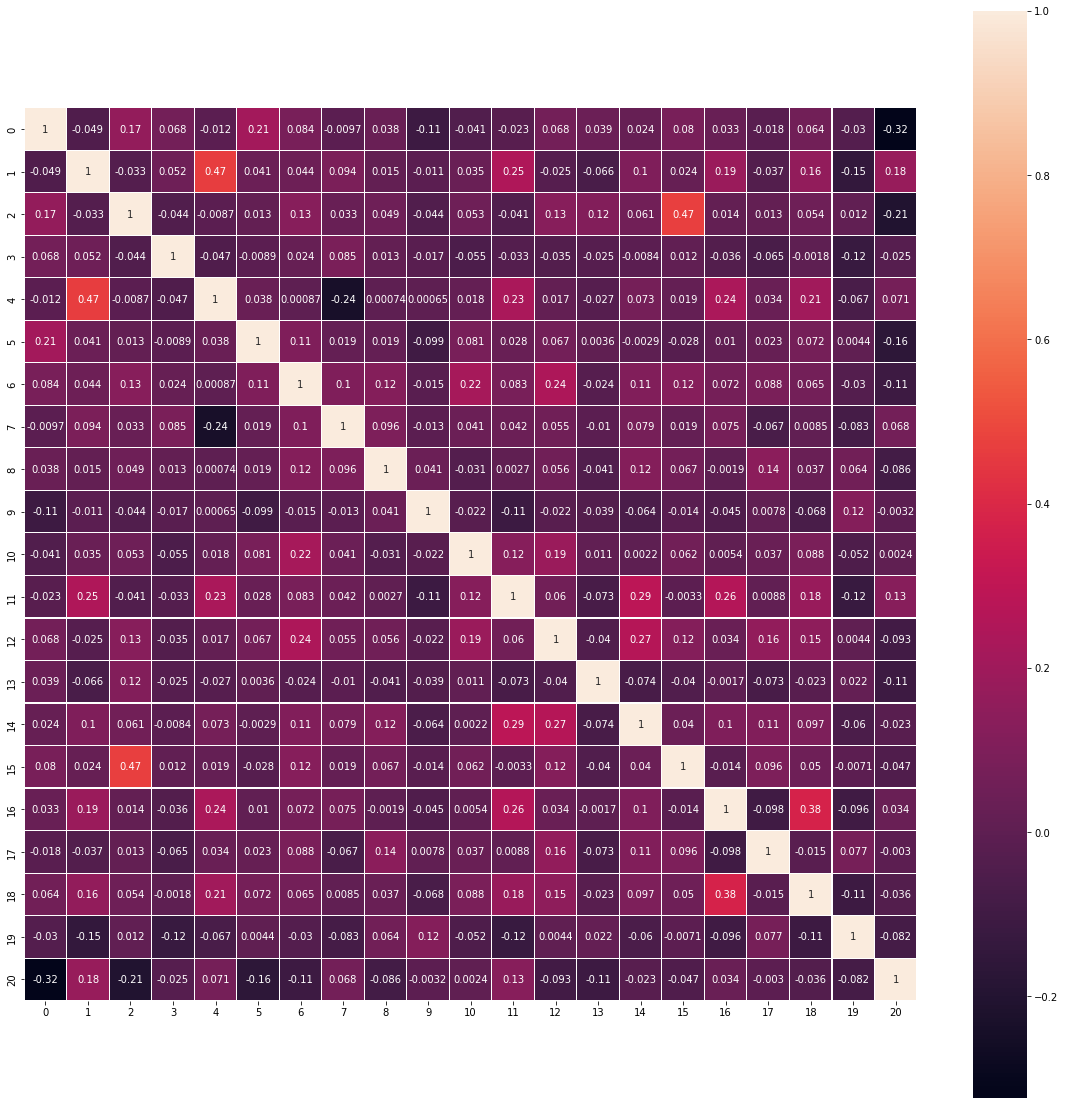

In [31]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(method='kendall'),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

Feature: 0, Score: 0.21554
Feature: 1, Score: 0.05483
Feature: 2, Score: 0.05936
Feature: 3, Score: 0.04524
Feature: 4, Score: 0.03904
Feature: 5, Score: 0.06970
Feature: 6, Score: 0.04831
Feature: 7, Score: 0.03436
Feature: 8, Score: 0.02304
Feature: 9, Score: 0.04685
Feature: 10, Score: 0.03290
Feature: 11, Score: 0.06252
Feature: 12, Score: 0.03767
Feature: 13, Score: 0.04495
Feature: 14, Score: 0.02230
Feature: 15, Score: 0.03951
Feature: 16, Score: 0.03246
Feature: 17, Score: 0.03439
Feature: 18, Score: 0.04100
Feature: 19, Score: 0.01602


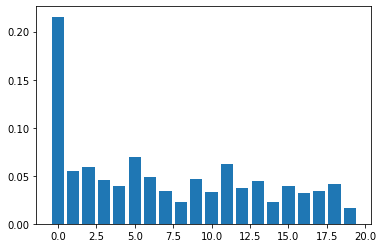

In [32]:
# xgboost for feature importance on a classification problem
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from matplotlib import pyplot
# define dataset
X, y = df.drop(20, axis=1), df[20]
# define the model
model = XGBClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.14600
Feature: 1, Score: 0.08227
Feature: 2, Score: 0.05150
Feature: 3, Score: 0.07274
Feature: 4, Score: 0.16313
Feature: 5, Score: 0.04901
Feature: 6, Score: 0.04609
Feature: 7, Score: 0.02354
Feature: 8, Score: 0.02679
Feature: 9, Score: 0.02745
Feature: 10, Score: 0.05639
Feature: 11, Score: 0.05244
Feature: 12, Score: 0.10036
Feature: 13, Score: 0.01971
Feature: 14, Score: 0.01241
Feature: 15, Score: 0.02300
Feature: 16, Score: 0.02887
Feature: 17, Score: 0.00493
Feature: 18, Score: 0.01337
Feature: 19, Score: 0.00000


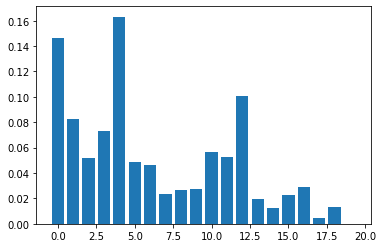

In [33]:

# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# define dataset
#X, y = df.drop(20) , df[20]
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Modeling (Without Data Sampling)

In [34]:
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline as pl
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [35]:
def load_dataset(full_path):
# load the dataset as a numpy array
  dataframe = read_csv(full_path, header=None)
  # split into inputs and outputs
  last_ix = len(dataframe.columns) - 1
  X, y = dataframe.drop(last_ix, axis=1), dataframe[last_ix]
  # select categorical and numerical features
  cat_ix = X.select_dtypes(include=['object', 'bool']).columns
  num_ix = X.select_dtypes(include=['int64', 'float64']).columns
  # label encode the target variable to have the classes 0 and 1
  y = LabelEncoder().fit_transform(y)
  return X.values, y, cat_ix, num_ix

In [36]:
def f2_measure(y_true, y_pred):
  return fbeta_score(y_true, y_pred, beta=2)

In [37]:
def evaluate_model(X, y, model):
  # define evaluation procedure
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  # define the model evaluation metric
  metric = make_scorer(f2_measure)
  # evaluate model
  scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
  return scores

In [38]:
def classification_models():
  class_models, class_names = list(), list()
  # LR
  class_models.append(LogisticRegression(solver='liblinear'))
  class_names.append('LR')
  # LDA
  class_models.append(LinearDiscriminantAnalysis())
  class_names.append('LDA')
  # NB
  class_models.append(GaussianNB())
  class_names.append('NB')
  # GPC
  class_models.append(GaussianProcessClassifier())
  class_names.append('GPC')
  # SVM
  class_models.append(SVC(gamma='scale'))
  class_names.append('SVM')
  #DT
  class_models.append(DecisionTreeClassifier())
  class_names.append('Decision Tree')
  #MLP
  class_models.append(MLPClassifier())
  class_names.append('MLP')
  #XGB
  class_models.append(XGBClassifier())
  class_names.append('XGB')
  return class_models, class_names

>LR 0.498 (0.072)
>LDA 0.519 (0.072)
>NB 0.639 (0.049)
>GPC 0.219 (0.061)
>SVM 0.436 (0.077)
>Decision Tree 0.438 (0.083)
>MLP 0.544 (0.086)
>XGB 0.467 (0.092)


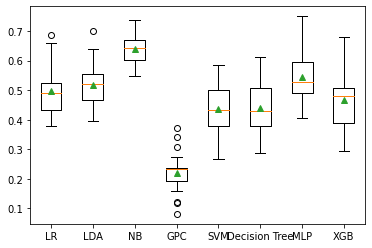

In [39]:
full_path = '/content/drive/MyDrive/german.csv'
# load the dataset
X, y, cat_ix, num_ix = load_dataset(full_path)
# define models
class_models, class_names = classification_models()
results = list()
# evaluate each model
for i in range(len(class_models)):
  # one hot encode categorical, normalize numerical
  ct = ColumnTransformer([('c',OneHotEncoder(),cat_ix), ('n',MinMaxScaler(),num_ix)])
  # wrap the model in a pipeline
  pipeline = pl(steps=[('t',ct),('m',class_models[i])])
  # evaluate the model and store results
  scores = evaluate_model(X, y, pipeline)
  results.append(scores)
# summarize and store
  print('>%s %.3f (%.3f)' % (class_names[i], mean(scores), std(scores)))
# plot the results
pyplot.boxplot(results, labels=class_names, showmeans=True)
pyplot.show()

# SVM with Undersampling



In [40]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import OneSidedSelection

In [41]:
# define undersampling models to test
def get_models():
  models, names = list(), list()
  # TL
  models.append(TomekLinks())
  names.append('TL')
  # ENN
  models.append(EditedNearestNeighbours())
  names.append('ENN')
  # RENN
  models.append(RepeatedEditedNearestNeighbours())
  names.append('RENN')
  # OSS
  models.append(OneSidedSelection())
  names.append('OSS')
  # NCR
  models.append(NeighbourhoodCleaningRule())
  names.append('NCR')
  return models, names

>TL 0.506 (0.081)
>ENN 0.675 (0.055)
>RENN 0.712 (0.040)
>OSS 0.505 (0.083)
>NCR 0.672 (0.056)


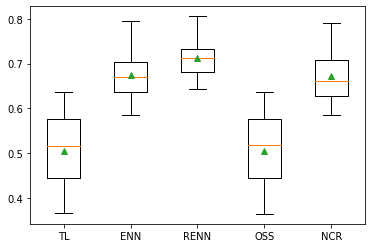

In [42]:
# define models
models, names = get_models()
results = list()
# evaluate each model
for i in range(len(models)):
# define model to evaluate
  model = SVC(gamma='scale')
  # one hot encode categorical, normalize numerical
  ct = ColumnTransformer([('c',OneHotEncoder(),cat_ix), ('n',MinMaxScaler(),num_ix)])
  # scale, then undersample, then fit model
  pipeline = Pipeline(steps=[('t',ct), ('s', models[i]), ('m',model)])
  # evaluate the model and store results
  scores = evaluate_model(X, y, pipeline)
  results.append(scores)
  # summarize and store
  print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))
# plot the results
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

## Other algorithms with undersampling

In [43]:
# define models
models, names = get_models()
results = list()
# evaluate each model
for j in range(len(class_names)):
  print('Algorithm name:', class_names[j])
  for i in range(len(models)):
    # one hot encode categorical, normalize numerical
    ct = ColumnTransformer([('c',OneHotEncoder(),cat_ix), ('n',MinMaxScaler(),num_ix)])
    # scale, then undersample, then fit model
    pipeline = Pipeline(steps=[('t',ct), ('s', models[i]), ('m',class_models[j])])
    # evaluate the model and store results
    scores = evaluate_model(X, y, pipeline)
    results.append(scores)
    # summarize and store
    
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

Algorithm name: LR
>TL 0.525 (0.065)
>ENN 0.694 (0.053)
>RENN 0.716 (0.042)
>OSS 0.529 (0.065)
>NCR 0.685 (0.058)
Algorithm name: LDA
>TL 0.548 (0.066)
>ENN 0.696 (0.050)
>RENN 0.717 (0.045)
>OSS 0.553 (0.068)
>NCR 0.688 (0.064)
Algorithm name: NB
>TL 0.653 (0.044)
>ENN 0.660 (0.044)
>RENN 0.571 (0.076)
>OSS 0.651 (0.045)
>NCR 0.692 (0.047)
Algorithm name: GPC
>TL 0.312 (0.064)
>ENN 0.641 (0.070)
>RENN 0.690 (0.053)
>OSS 0.314 (0.067)
>NCR 0.668 (0.069)
Algorithm name: SVM
>TL 0.506 (0.081)
>ENN 0.675 (0.055)
>RENN 0.712 (0.040)
>OSS 0.507 (0.083)
>NCR 0.672 (0.056)
Algorithm name: Decision Tree
>TL 0.477 (0.075)
>ENN 0.622 (0.069)
>RENN 0.673 (0.048)
>OSS 0.486 (0.086)
>NCR 0.603 (0.068)
Algorithm name: MLP
>TL 0.549 (0.076)
>ENN 0.679 (0.049)
>RENN 0.714 (0.052)
>OSS 0.547 (0.087)
>NCR 0.667 (0.065)
Algorithm name: XGB
>TL 0.504 (0.097)
>ENN 0.670 (0.065)
>RENN 0.706 (0.046)
>OSS 0.517 (0.096)
>NCR 0.674 (0.076)


Oversampling

In [44]:
from imblearn.over_sampling import SMOTE, ADASYN 

In [45]:
def get_oversampling_models():
  ov_models, ov_names = list(), list()
  ov_models.append(SMOTE())
  ov_names.append("SMOTE")

  ov_models.append(ADASYN())
  ov_names.append('ADASYN')

  return ov_models, ov_names

In [46]:
over_models, over_names = get_oversampling_models()

In [48]:
for j in range(len(class_names)):
  print('Algorithm name:', class_names[j])
  for i in range(len(over_models)):
    # one hot encode categorical, normalize numerical
    ct = ColumnTransformer([('c',OneHotEncoder(),cat_ix), ('n',MinMaxScaler(),num_ix)])
    # scale, then undersample, then fit model
    pipeline = Pipeline(steps=[('t',ct), ('s', over_models[i]), ('m',class_models[j])])
    # evaluate the model and store results
    scores = evaluate_model(X, y, pipeline)
    results.append(scores)
    # summarize and store
    
    print('>%s %.3f (%.3f)' % (over_names[i], mean(scores), std(scores)))

Algorithm name: LR
>SMOTE 0.656 (0.070)
>ADASYN 0.650 (0.070)
Algorithm name: LDA
>SMOTE 0.659 (0.068)
>ADASYN 0.657 (0.069)
Algorithm name: NB
>SMOTE 0.671 (0.047)
>ADASYN 0.667 (0.045)
Algorithm name: GPC
>SMOTE 0.654 (0.072)
>ADASYN 0.657 (0.072)
Algorithm name: SVM
>SMOTE 0.583 (0.092)
>ADASYN 0.586 (0.086)
Algorithm name: Decision Tree
>SMOTE 0.489 (0.077)
>ADASYN 0.485 (0.079)
Algorithm name: MLP
>SMOTE 0.562 (0.083)
>ADASYN 0.559 (0.083)
Algorithm name: XGB
>SMOTE 0.553 (0.091)
>ADASYN 0.552 (0.089)
